---
# seaborn
---

- matplotlib을 기반으로 하는 파이썬 데이터 시각화 라이브러리
- 통계 관련 데이터 시각화를 할 수 있는 고차원의 인터페이스를 제공
- 매우 간결하고 직관적이지만, 세부적인 변경에 제한이 있음.
- 공식 참고자료: https://seaborn.pydata.org/api.html

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

In [3]:
print(sns.__version__)

0.12.0


In [4]:
# seaborn 그래프 스타일 테마 지정

sns.set_style("whitegrid")

In [5]:
# seaborn의 "flights" 데이터셋 로드
# titanic, iris 등 여러 자료가 있음.

flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


# 1. lineplot - 수치형 데이터

year
1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
1960    476.166667
Name: passengers, dtype: float64

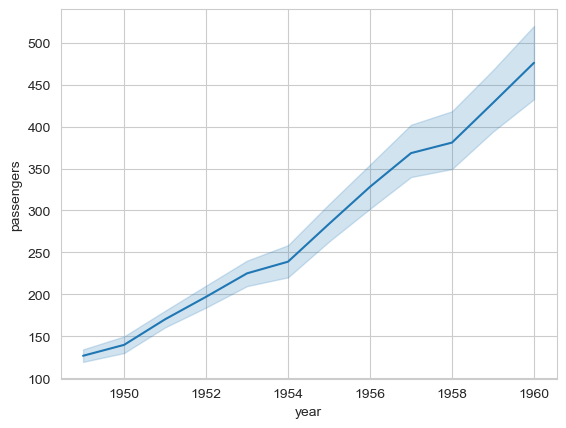

In [26]:
# 라인 그래프 그리기
# 라인 주위의 투명하고 두꺼운 면적은 연도마다 반복되는 값이 집계되어 평균과 95% 신뢰구간을 나타냄.

sns.lineplot(x='year', y='passengers', data=flights)

# flights[flights['year'] == 1952]["passengers"].mean()
flights.groupby('year')["passengers"].mean()

    year month  passengers
8   1949   Sep         136
20  1950   Sep         158
32  1951   Sep         184
44  1952   Sep         209
56  1953   Sep         237


<AxesSubplot:xlabel='year', ylabel='passengers'>

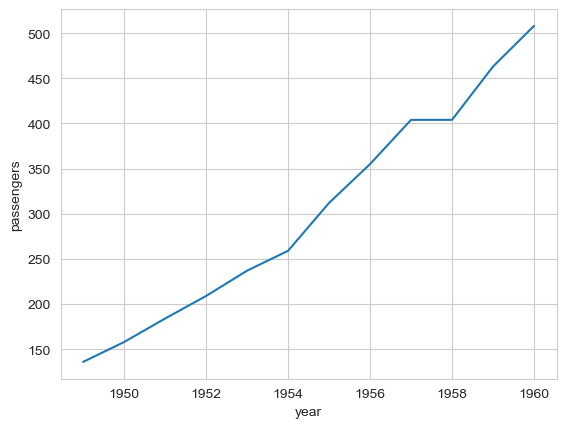

In [27]:
# df의 query를 이용하여 9월 데이터만 한정하여 시각화함.
# 각 년도마다 9월 데이터는 하나씩만 존재하기 때문에 투명하고 두꺼운 면적은 없음.

september_flights = flights.query("month == 'Sep'")
print(september_flights.head())

sns.lineplot(x='year', y='passengers', data=september_flights)

<AxesSubplot:xlabel='year', ylabel='passengers'>

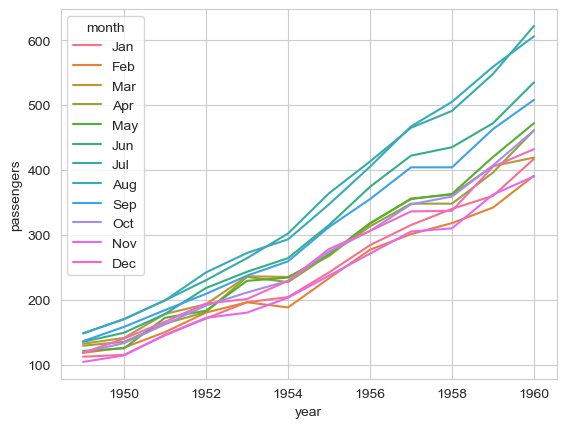

In [28]:
# 매개변수 hue에 구분하고자 하는 변수를 넣으면 그에 따라 분리된 라인 그래프가 그려짐.

sns.lineplot(x='year', y='passengers', hue='month', data=flights)

In [30]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/Users/jsha/opt/anaconda3/envs/nlp3810/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jsha/opt/anaconda3/envs/nlp3810/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


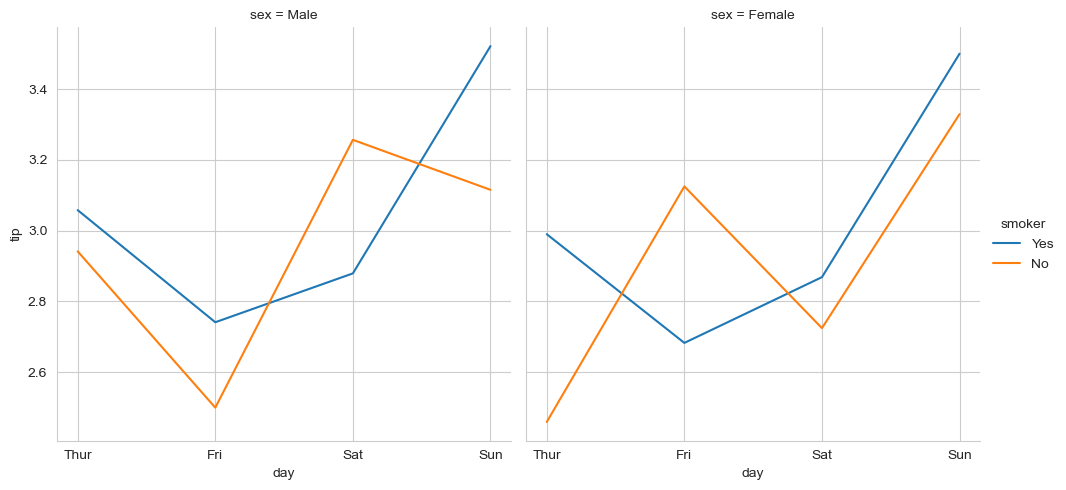

In [33]:
# relplot을 이용하여 라인그래프를 2개 이상 그릴 수 있음.
# kind='line', col='sex'로 설정하면, 성별을 분리하여 그래프를 그려줌.
# ci는 신뢰구간을 의미함. ci='sd'로 설정하면 표준편차를 사용할 수 있음.

sns.relplot(x='day', y='tip', kind='line', col='sex', 
            hue='smoker', ci=None, data=tips)

## 1.1. lineplot 연습문제

> 문제1) 다음 순서에 따라 그래프를 완성하세요.

1) seaborn dataset에서 'penguins'를 로드하세요.
2) 데이터셋의 처음 5개 행을 출력하여 데이터 구조를 확인하세요.
3) x축은 "flipper_length_mm", y축은 "bill_length_mm"를 이용하여 선그래프를 그리세요.
4) 그래프는 "species" 열의 값에 따라 색상으로 구분됩니다.
5) x축과 y축에 적당한 레이블을 추가합니다.
6) 그래프에 적당한 제목을 설정합니다.
7) 범례 제목에 'Species'라고 설정합니다.

> 문제2) 위 코드에서 y축을 'body_mass_g'로 바꾸고, species도 'Adelie'만 선그래프로 표시하며, 적당한 레이블과 제목으로 바꿔 그래프를 완성하세요.



# 2. histoplot - 데이터 분포 확인

In [34]:
# 펭귄 데이터 로드

penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

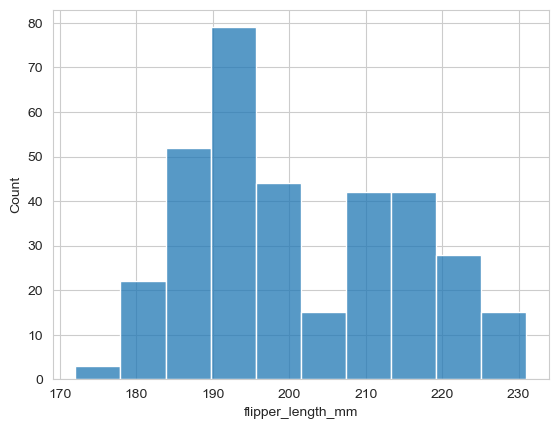

In [35]:
# histplot으로 히스토그램 그리기
# 변수 1개를 사용하며 해당 변수에 대한 count를 반환함.

sns.histplot(x='flipper_length_mm', data=penguins)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

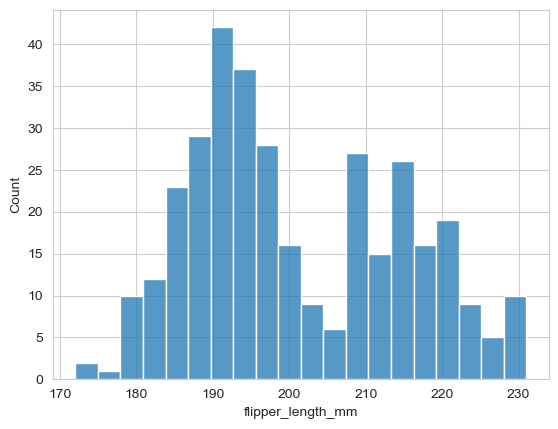

In [36]:
# bins를 이용하여 막대 개수를 조절할 수 있음.

sns.histplot(x='flipper_length_mm', bins=20, data=penguins)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

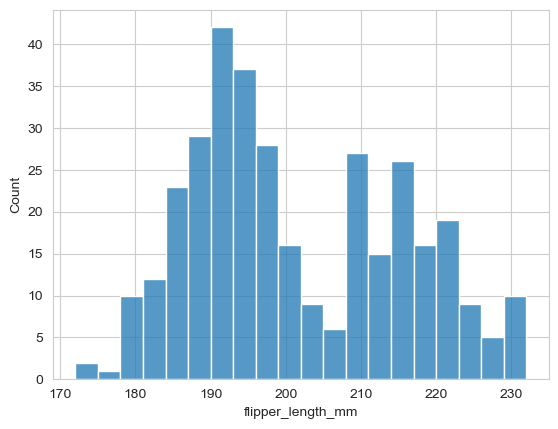

In [41]:
# binwidth는 bins와 다르게, 개수가 아닌 너비를 조정할 수 있음. 그래도 같은 효과를 볼 수 있음.
# 기본 설정은 6이며, 숫자가 작을수록 더 세밀하게 막대를 표현함.

sns.histplot(x='flipper_length_mm', binwidth=3, data=penguins)

<AxesSubplot:xlabel='Count', ylabel='flipper_length_mm'>

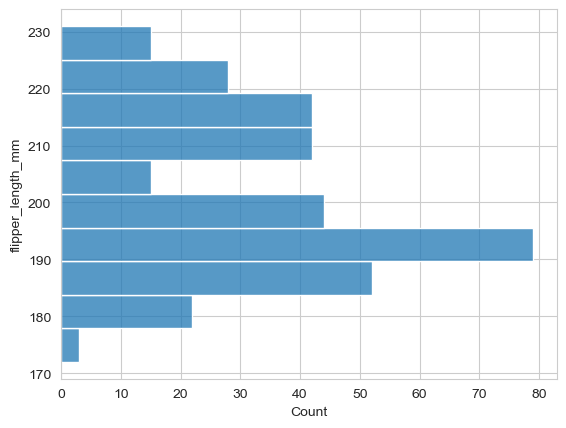

In [42]:
# y 인자에 변수를 넣어줌으로서 수평 막대그래프를 그릴 수 있음.

sns.histplot(y='flipper_length_mm', data=penguins)

['Adelie' 'Chinstrap' 'Gentoo']


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

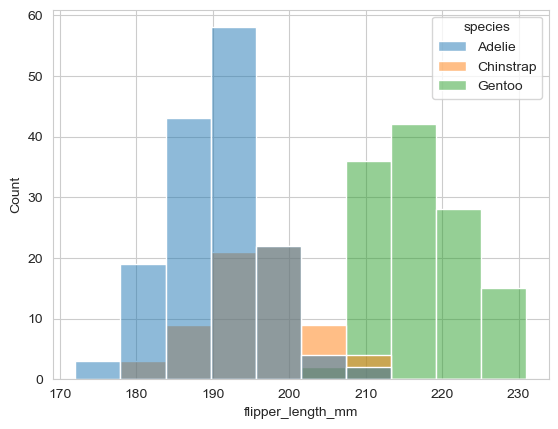

In [45]:
# hue를 이용하여 그룹별로 세분화하여 시각화함.

print(penguins['species'].unique())

sns.histplot(x='flipper_length_mm', hue='species', data=penguins)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

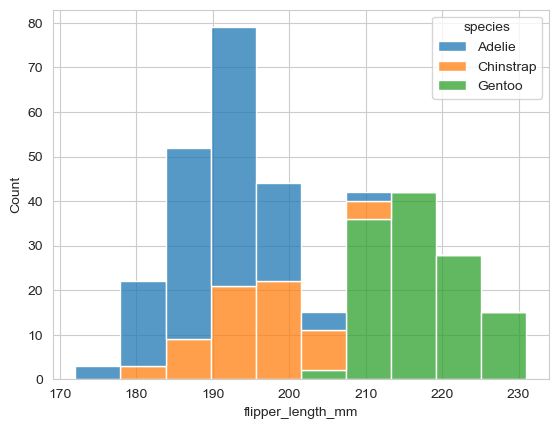

In [46]:
# multiple='stack'으로 'species'가 겹치지 않고 누적되게 그릴 수 있음.

sns.histplot(x='flipper_length_mm', hue='species', multiple='stack', data=penguins)

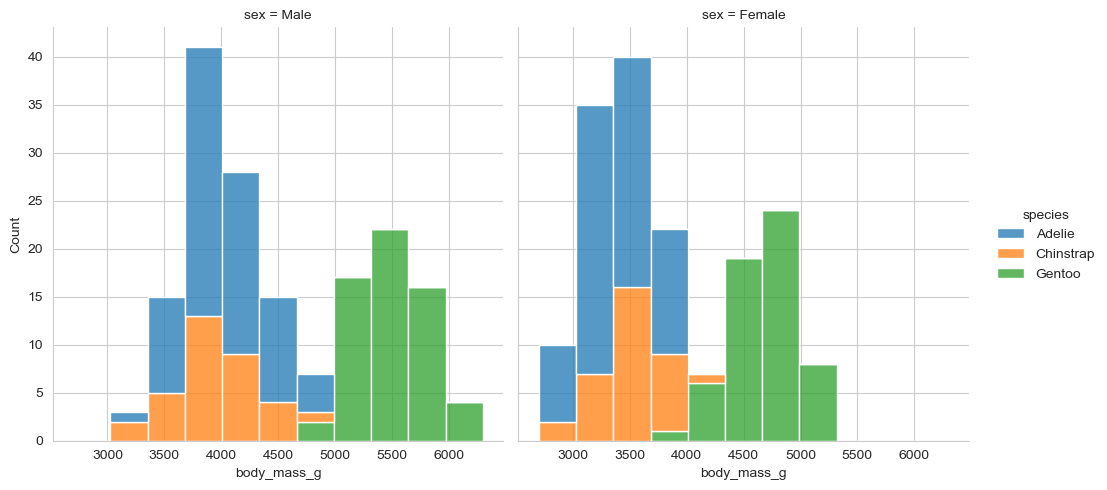

In [47]:
# histogram을 동시에 여러 개 그릴렬면 displot()을 사용함.
# col 인자에 분리 기준이 되는 변수를 입력함.

sns.displot(x='body_mass_g', hue='species', col='sex', 
            kind='hist', multiple='stack', data=penguins)

## 2.1. histplot 연습문제

> 문제1) 다음 순서에 따라 그래프를 완성하세요.

1) seaborn dataset에서 'titanic'를 로드하세요.
2) 데이터셋의 처음 5개 행을 출력하여 데이터 구조를 확인하세요.
3) 'age' 열을 기반으로 한 히스토그램을 생성하고, 생존 여부('survived')에 따른 분포를 표시하며, 커널 밀도 추정(kde)을 추가합니다.
4) x축과 y축에 적당한 레이블을 추가합니다.
5) 그래프에 적당한 제목을 설정합니다.

> 문제2) 위 코드에서 x축을 'fare', hue를 'class'로 바꿔 그래프를 그려보세요.



# 3. scatterplot - 수치형 데이터 상관관계

In [48]:
# tips 데이터 로드

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

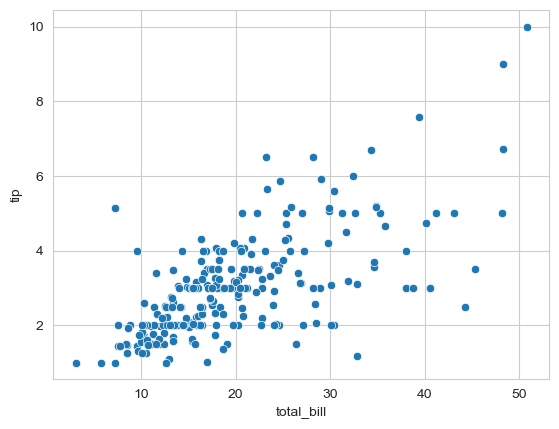

In [49]:
# scatterplot을 이용하여 산점도 그리기
# 두 변수의 양의 상관관계를 볼 수 있음.

sns.scatterplot(x='total_bill', y='tip', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

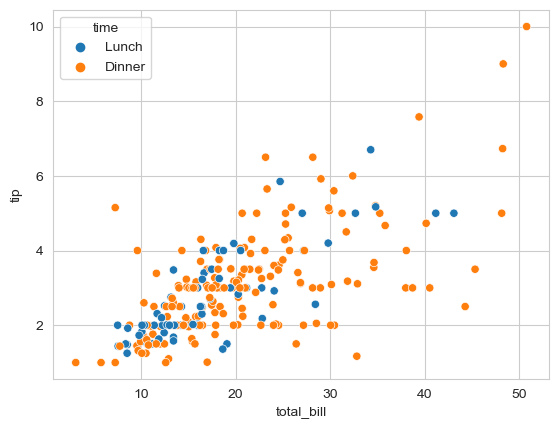

In [50]:
# hue를 이용하여 그룹별 산점도를 시각화 할 수 있음.

sns.scatterplot(x='total_bill', y='tip', hue='time', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

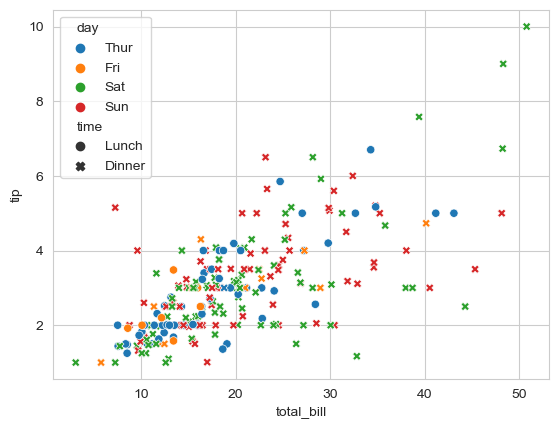

In [51]:
# style 인자를 이용하여 시간대별로 style을 달리하여 표현할 수 있음.

sns.scatterplot(x='total_bill', y='tip', hue='day', style='time', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

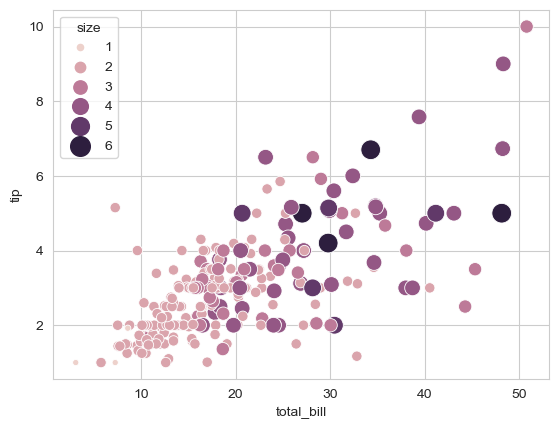

In [54]:
# 데이터 수치에 따라 산점도의 사이즈 변경 가능함.
# size 인자에는 size 수치를 대변할 변수를 입력함. 이 인자가 있어야만이 size에 따른 변화를 표시할 수 있음.
# sizes=(20, 200)에는 도형의 최소, 최대 사이즈를 입력함.

sns.scatterplot(x='total_bill', y='tip', hue='size', 
                size='size', sizes=(20, 200), legend='full', data=tips)

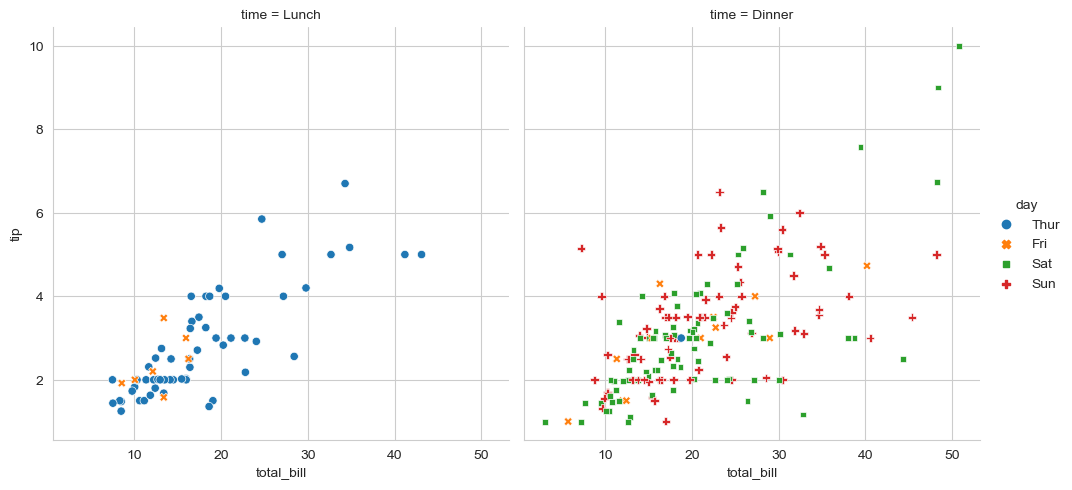

In [55]:
# 산점도를 여러 개 동시에 출력하기 위해, replot()을 사용함.
# displot()과 유사함.

sns.relplot(x='total_bill', y='tip', col='time', hue='day', style='day', 
            kind='scatter', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

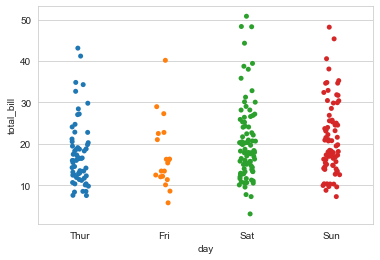

In [32]:
sns.stripplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

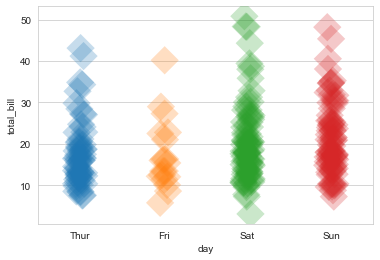

In [34]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=0.05, marker='D', size=20, edgecolor="gray", alpha=.25)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

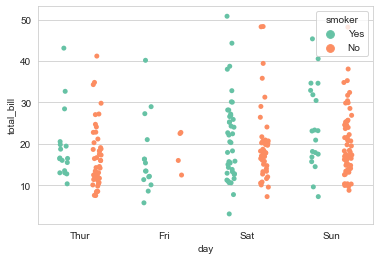

In [28]:
sns.stripplot(x='day', y='total_bill', hue='smoker', palette='Set2', dodge=True, data=tips)

## 3.1. scatterplot 연습문제

> 문제1) seaborn dataset에서 'penguins'를 데이터 프레임으로 만들고, 부리 길이와 체중 관계를 scatterplot으로 시각화 하세요.

> 문제2) 위 코드에서 부리 깊이에 따라 scatter의 크기를 표현하도록 시각화 하세요.



# 4. countplot - 범주형 데이터 개수 확인

- seaborn에는 여러 종류의 막대그래프가 있음. barplot(), histoplot(), countplot()
- 범주형 데이터에 사용하며 단순하게 관측값의 개수를 표시함.

In [56]:
# tips 데이터 로드

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


<AxesSubplot:xlabel='day', ylabel='count'>

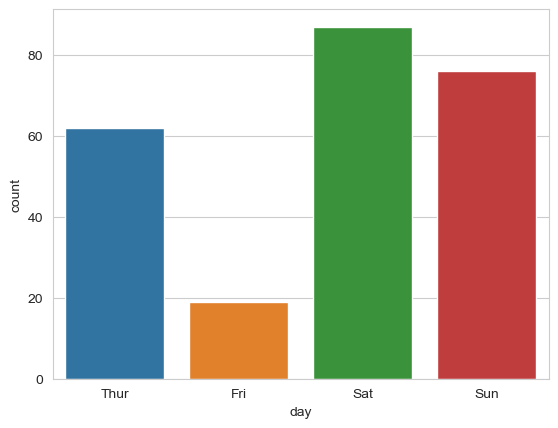

In [57]:
# 4개의 요일 값이 있는 범주형 데이터인 day 변수를 시각화

print(tips['day'].value_counts())

sns.countplot(x='day', data=tips)

<AxesSubplot:xlabel='day', ylabel='count'>

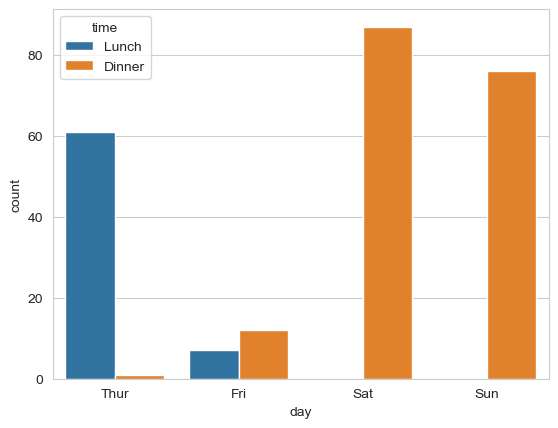

In [58]:
# hue 인자를 이용하여 그룹별로 구분하여 표현함.

sns.countplot(x='day', hue='time', data=tips)

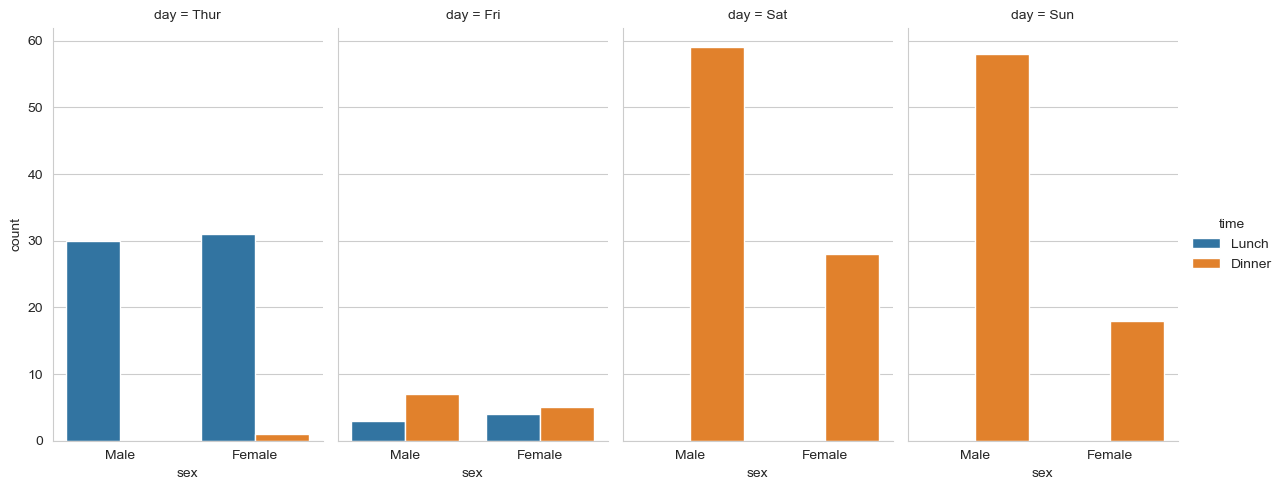

In [59]:
# 한번에 여러 개의 countplot을 그릴 때는 catplot을 이용함.

sns.catplot(x='sex', hue='time', col='day',
                data=tips, kind='count', height=5, aspect=.6)

## 4.1. countplot 연습문제

> 문제1) seaborn dataset에서 'titanic'를 데이터 프레임으로 만들고, 'sex' 카테고리 별로 생존자 수를 세는 그래프를 그리세요.

> 문제2) 'pclass'별로 생존자 수를 세는 그래프를 그리세요.

# 5. barplot - 범주형과 수치형 데이터

- 각 막대의 높이가 입력한 수치형 변수에 대한 중심 경향의 추정치를 나타냄.
- 막대 상단에 오차막대를 표시하여 해당 추정치 주변의 불확실성도 함께 표현함.

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


<AxesSubplot:xlabel='day', ylabel='total_bill'>

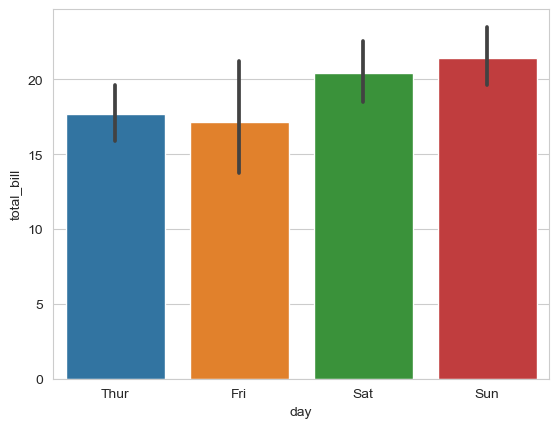

In [65]:
# 요일별 지불한 총 가격 변수

print(tips.groupby('day')['total_bill'].mean())

sns.barplot(x='day', y='total_bill', data=tips)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

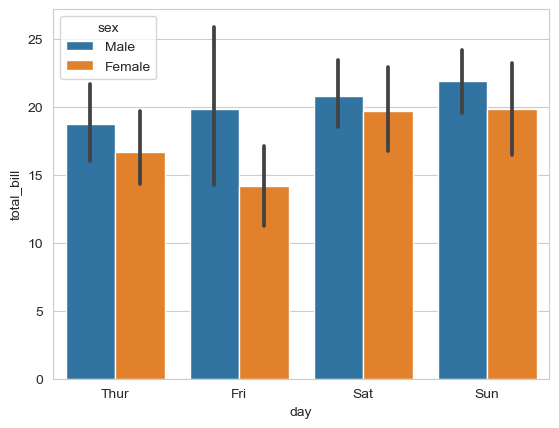

In [66]:
# hue를 이용하여 성별로 막대그래프를 나타냄.

sns.barplot(x='day', y='total_bill', hue='sex', data=tips)

/var/folders/j8/pjz_xxgx4xqdv4jz1jkf7nmc0000gn/T/ipykernel_8655/1934903728.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 65)` for the same effect.

  sns.barplot(x='day', y='total_bill', hue='sex', data=tips, ci=65, palette='Blues_d')


<AxesSubplot:xlabel='day', ylabel='total_bill'>

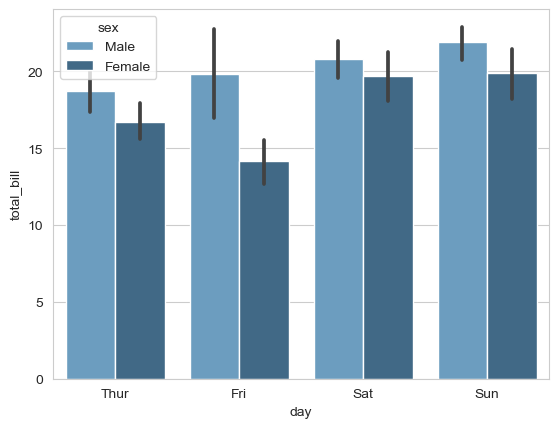

In [67]:
# palette 인자를 이용하여 색상 팔레트를 바꿀 수 있음.
# ci=65는 신뢰구간 65%를 의미함.

sns.barplot(x='day', y='total_bill', hue='sex', data=tips, ci=65, palette='Blues_d')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

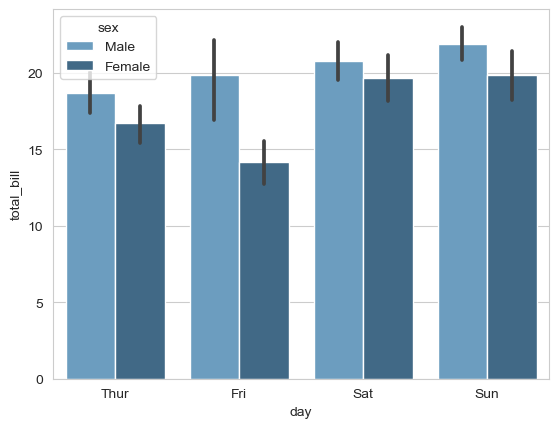

In [70]:
# palette 인자를 이용하여 컬러셋을 바꿀 수 있음.
# palette 참고자료: https://seaborn.pydata.org/tutorial/color_palettes.html 
# ci=65는 신뢰구간 65%를 의미함.

sns.barplot(x='day', y='total_bill', hue='sex', data=tips, errorbar=('ci',65), palette='Blues_d')

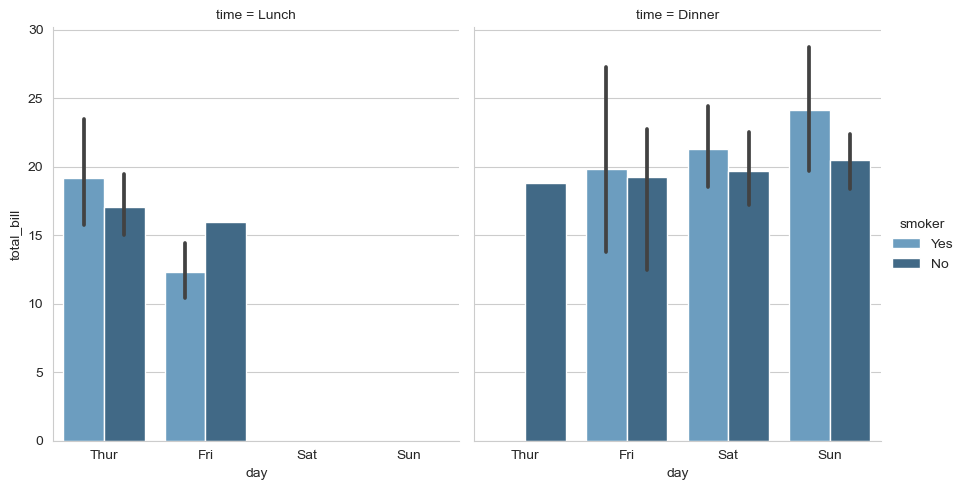

In [71]:
# 동시에 여러 개의 막대그래프를 그릴 때는 catplot()을 사용함.
# kind에 'bar'를 입력하면 barplot, 'count'를 입력하면 countplot이 됨.
# 그래프를 시간대별로 분리하기 위해 col='time'으로 지정함.

sns.catplot(x='day', y='total_bill', hue='smoker', col='time',
            data=tips, kind='bar', palette='Blues_d', height=5, aspect=.9);

# 6. boxplot - 범주형과 수치형 데이터

- 4분위수 기준의 데이터 분포와 이상값을 확인하는 용도로 활용됨.
- 이 이상의 용도로는 활용하지 못함.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

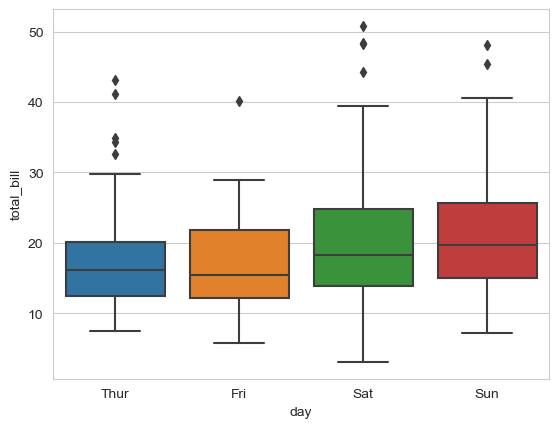

In [72]:
# x에 범주형, y에 수치형 데이터를 입력하여 boxplot을 나타냄.

sns.boxplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='total_bill'>

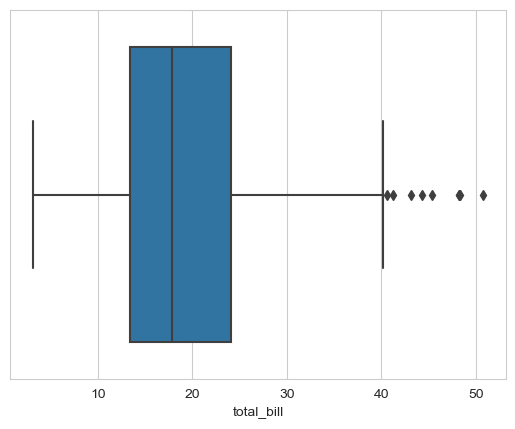

In [73]:
# 물론 전체 데이터에서 수치형 데이터의 분포를 보고싶다면, x축에 수치형 데이터를 써도 됨.

sns.boxplot(x='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

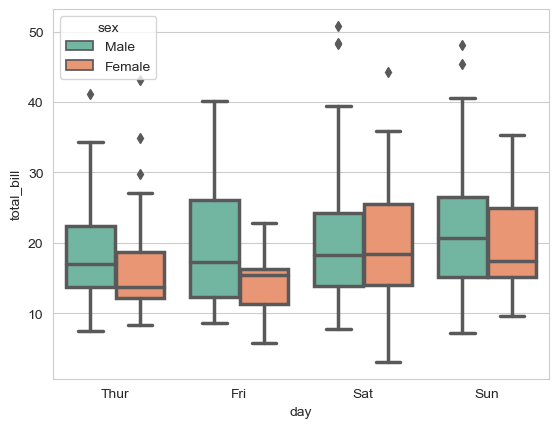

In [74]:
# hue 인자를 이용하여 성별에 따른 데이터의 boxplot을 보여줌.

sns.boxplot(x='day', y='total_bill', hue='sex', data=tips, linewidth=2.5, 
            palette='Set2')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

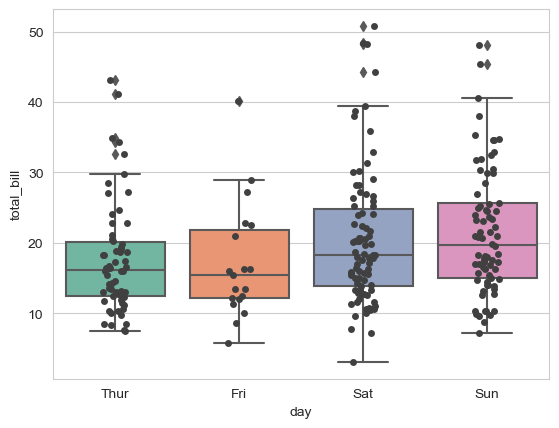

In [75]:
# boxplot은 데이터의 분포를 표현하지 못하는 단점이 있음.
# stripplot을 이용하여 범주별 수치형 데이터의 분포를 파악할 수 있어 boxplot을 보완함.

sns.boxplot(x='day', y='total_bill', data=tips, palette='Set2')
sns.stripplot(x='day', y='total_bill', data=tips, color=".25")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

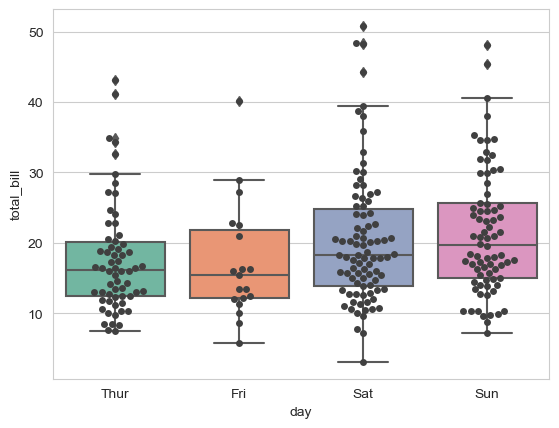

In [77]:
# stipplot() 대신 swarmplot()을 활용하면 산점도의 점들을 겹치지 않게 출력할 수 있음.
# 그러나 swarmplot()은 데이터 수가 너무 많으면 잘 작동하지 않음.
# swarmplot을 꿀벌 그래프(beeswarm 그래프)라고도 부름.

sns.boxplot(x='day', y='total_bill', data=tips, palette='Set2')
sns.swarmplot(x='day', y='total_bill', data=tips, color=".25")

# 7. violinplot - 범주형과 수치형 데이터

<AxesSubplot:xlabel='day', ylabel='total_bill'>

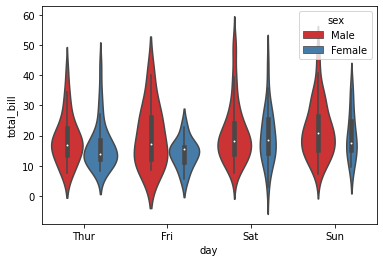

In [6]:
# 사용법은 boxplot()과 유사함.
# hue를 이용하여 성별에 따라 분리하여 보여줌.

sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, palette='Set1', scale='count')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

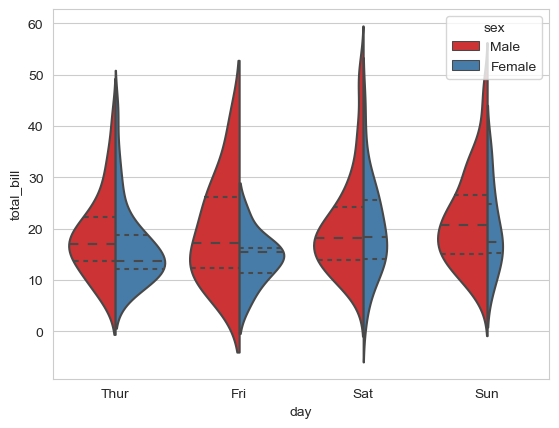

In [78]:
# hue를 이용하여 성별을 구분하지만, split=True를 이용하여 성별 데이터를 하나의 바이올린 그래프에 표현 가능함.
# 단, split=True를 사용할 수 있는 경우는, hue에 사용된 변수가 2개의 고윳값으로 구성되어 있을 경우에 한함.
# inner='quartile' 설정은, 4분위 수를 표시함.

sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, palette='Set1', split=True, scale='count', inner='quartile')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

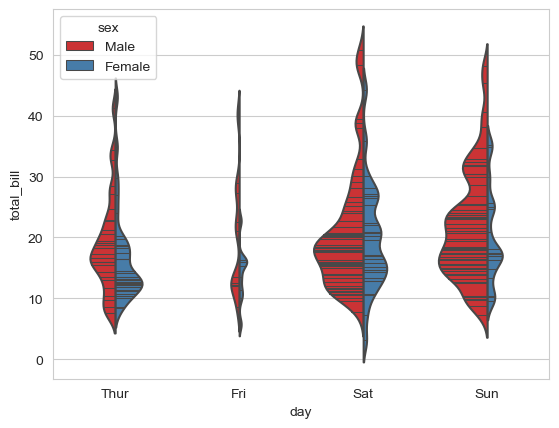

In [79]:
# 기본 violinplot에서 좀 더 분포 모양을 반영한 모습으로 시각화한다면, bw(bandwidth) 수치를 조절하여 대여폭을 줄여야 함.

sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, palette='Set1', split=True, scale='count', inner='stick',
                    scale_hue=False, bw=.2)

In [80]:
# planets 데이터 로드

planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


<AxesSubplot:xlabel='orbital_period', ylabel='method'>

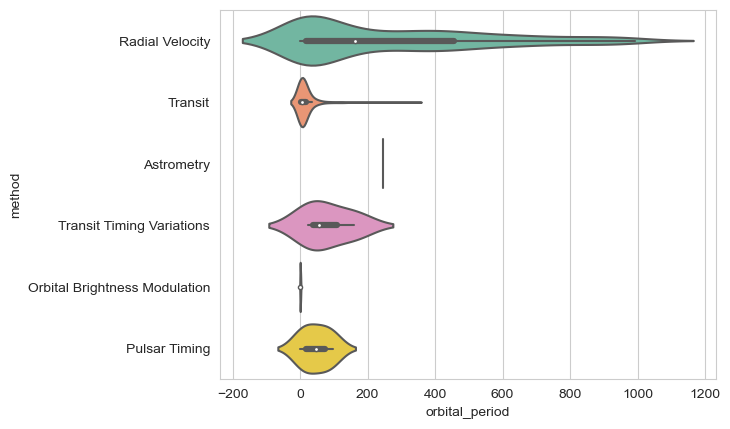

In [82]:
# orbital_period 변수 값 중 1000 미만인 데이터에 한정하여 plot
# y에 범주형 데이터를 입력하여 가로 방향 violinplot을 구현함.

sns.violinplot(x='orbital_period', y='method',
                    data=planets[planets.orbital_period < 1000],
                    scale='width', palette='Set2')

<AxesSubplot:xlabel='orbital_period', ylabel='method'>

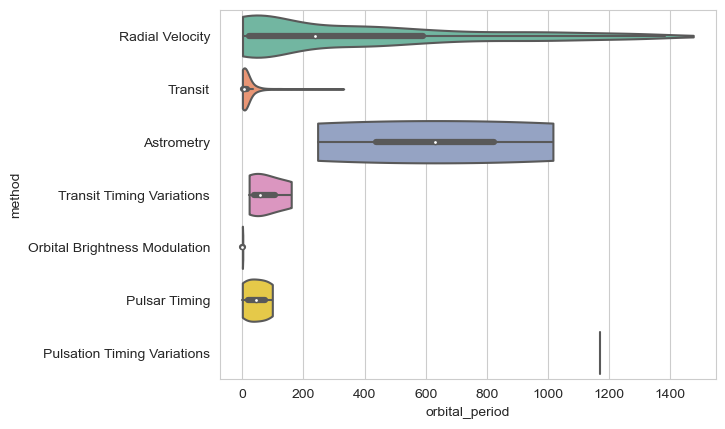

In [83]:
# orbital_period가 -200 까지 있음.
# cut 인자를 사용하여 데이터의 시작 부분을 자를 수 있음.
# cut = 0은 데이터를 0부터 시작하라는 의미임.

sns.violinplot(x='orbital_period', y='method',
                    data=planets[planets.orbital_period < 1500],
                    cut=0, scale='width', palette='Set2')

## 7.1. barplot, boxplot, violinplot 연습문제

> 문제1) seaborn dataset에서 'titanic'를 데이터 프레임으로 만들고,객실 등급에 따른 승객의 평균 나이 비교하는 barplot을 그리세요.(한글 폰트를 사용할 수 있게 설정하고, xlabel, ylabel, title을 적절히 설정하세요.)

> 문제2) 성별에 따른 승객의 요금 분포를 boxplot으로 표현하세요.

> 문제3) 성별에 따른 나이의 분포를 violinplot으로 표현하세요.